In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from joblib import dump, load
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')
df = df.fillna(0)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [3]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
X = df.drop(['AVG(diff)', 'uid'], axis=1)
y = df['AVG(diff)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,                     
    y,                     
    test_size=0.2,          
    random_state=21,        
)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)
test_rmse_scores = []
    
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
    model1 = DecisionTreeRegressor(random_state=21)
    model1.fit(X_train, y_train)
        
    y_train_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
        
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmse_scores.append(test_rmse)
        
    print(f"train -  {train_rmse}   |   test -  {test_rmse}")
    
avg_rmse = np.mean(test_rmse_scores)
print(f"Average RMSE on crossval is {avg_rmse}")
    

train -  0.0   |   test -  101.02363218207539
train -  0.0   |   test -  55.85193554124783
train -  0.0   |   test -  60.39487806342767
train -  0.0   |   test -  49.363228554596525
train -  0.0   |   test -  94.58784658835522
Average RMSE on crossval is 72.24430418594052


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)
test_rmse_scores = []
    
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
    model2 = LinearRegression(fit_intercept=False)
    model2.fit(X_train, y_train)
        
    y_train_pred = model2.predict(X_train)
    y_test_pred = model2.predict(X_test)
        
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmse_scores.append(test_rmse)
        
    print(f"train -  {train_rmse}   |   test -  {test_rmse}")
    
avg_rmse = np.mean(test_rmse_scores)
print(f"Average RMSE on crossval is {avg_rmse}")

train -  74.46374253516257   |   test -  63.63069731577074
train -  72.1432824838665   |   test -  83.4233594222999
train -  68.188642187448   |   test -  85.03136876879017
train -  74.68965925604896   |   test -  69.81418444822967
train -  67.08073951880333   |   test -  92.5097997502344
Average RMSE on crossval is 78.88188194106496


In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)
test_rmse_scores = []
    
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
    model3 = RandomForestRegressor(max_depth=4, random_state=21)
    model3.fit(X_train, y_train)
        
    y_train_pred = model3.predict(X_train)
    y_test_pred = model3.predict(X_test)
        
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmse_scores.append(test_rmse)
        
    print(f"train -  {train_rmse}   |   test -  {test_rmse}")
    
avg_rmse = np.mean(test_rmse_scores)
print(f"Average RMSE on crossval is {avg_rmse}")

train -  24.636596560680125   |   test -  82.83966575830355
train -  32.79649284509025   |   test -  40.59181158758577
train -  26.874765327366248   |   test -  62.422335570796655
train -  30.009237611968423   |   test -  41.27403245281089
train -  30.495109772856228   |   test -  78.75032546527088
Average RMSE on crossval is 61.17563416695354


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [9]:
predictions_model1 = model1.predict(X_test)
predictions_model2 = model2.predict(X_test)
predictions_model3 = model3.predict(X_test)

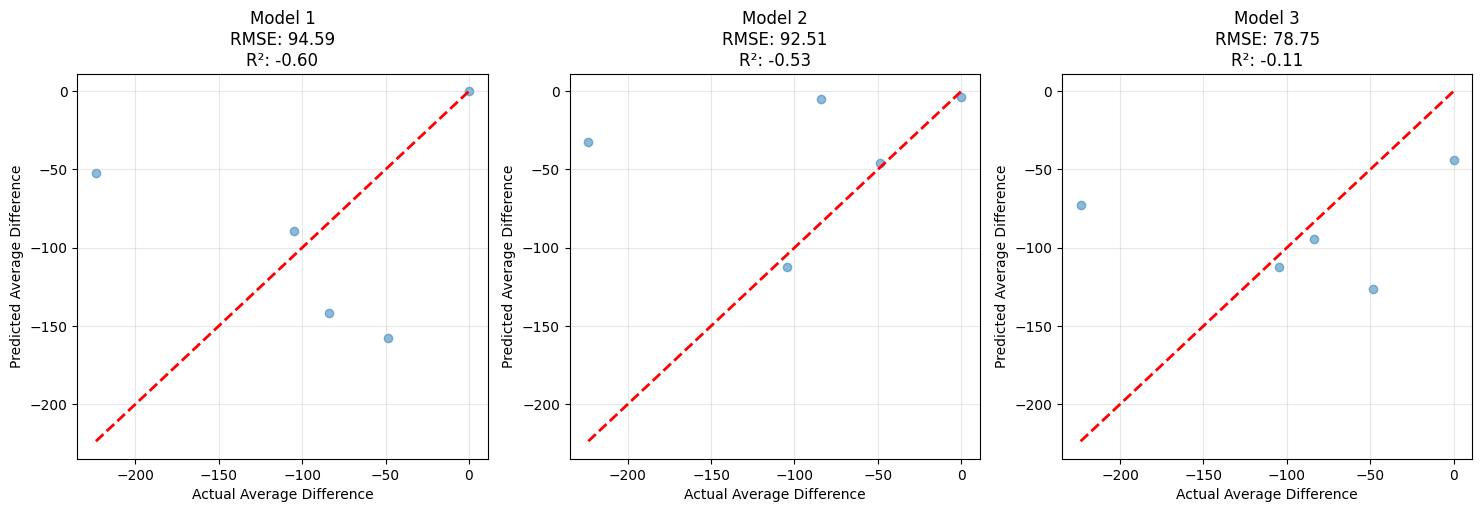

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(y_test, predictions_model1, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Average Difference')
axes[0].set_ylabel('Predicted Average Difference')
axes[0].set_title(f'Model 1\nRMSE: {np.sqrt(mean_squared_error(y_test, predictions_model1)):.2f}\nR²: {r2_score(y_test, predictions_model1):.2f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test, predictions_model2, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Average Difference')
axes[1].set_ylabel('Predicted Average Difference')
axes[1].set_title(f'Model 2\nRMSE: {np.sqrt(mean_squared_error(y_test, predictions_model2)):.2f}\nR²: {r2_score(y_test, predictions_model2):.2f}')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(y_test, predictions_model3, alpha=0.5)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Average Difference')
axes[2].set_ylabel('Predicted Average Difference')
axes[2].set_title(f'Model 3\nRMSE: {np.sqrt(mean_squared_error(y_test, predictions_model3)):.2f}\nR²: {r2_score(y_test, predictions_model3):.2f}')
axes[2].grid(True, alpha=0.3)